In [1]:
import keras

In [2]:
from keras import layers, models

In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.python.client import device_lib
from keras import backend as K
import tensorflow as tf
import cv2

In [4]:
import cv2
import numpy as np
import os, time, sys, shutil

In [5]:
file = open("/home/hamidraei/Odometry_project/train.txt")
speedTruthArrayString = file.readlines()
speedTruthArray = []
for numeric_string in speedTruthArrayString:
    numeric_string = numeric_string.strip('\n')
    speedTruthArray.append(float(numeric_string))

In [6]:
y = np.asarray(speedTruthArray)
y = y.reshape(y.shape[0], 1)
y.shape

(20400, 1)

In [7]:
X1 = []
X2 = []

In [8]:

flow_mat = None
image_scale = 0.5
nb_images = 1
win_size = 15
nb_iterations = 2
deg_expansion = 5
STD = 1.3


In [9]:
for i in range(20399):
    if i == 0:
        A = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview/{i}.jpg', 0)
        B = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview/{i+1}.jpg', 0)
        flow = cv2.calcOpticalFlowFarneback(A, B,flow_mat,image_scale,nb_images,win_size,
                                            nb_iterations,
                                            deg_expansion,
                                            STD,
                                            0)
        
        
        X1.append(flow)
        X1.append(flow)
        
        #Q = cv2.imread('/home/hamidraei/Odometry_project/Cannyview/1.jpg')
        #hsv = np.zeros_like(Q)
        #hsv[..., 1] = 255
        #mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        #hsv[..., 0] = ang * 180 / np.pi / 2
        #hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        #C = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i}.jpg',C)
        
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i+1}.jpg',C)
                                            
                                            
                                            
    else:
        A = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview/{i}.jpg', 0)
        B = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview/{i+1}.jpg', 0)
        flow = cv2.calcOpticalFlowFarneback(A, B,flow_mat,image_scale,nb_images,win_size,
                                            nb_iterations,
                                            deg_expansion,
                                            STD,
                                            0)
        
        X1.append(flow)
        
        #Q = cv2.imread('/home/hamidraei/Odometry_project/Cannyview/1.jpg')
        #hsv = np.zeros_like(Q)
        #hsv[..., 1] = 255
        #mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        #hsv[..., 0] = ang * 180 / np.pi / 2
        #hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        #C = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i}.jpg',C)
        
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i+1}.jpg',C)
        #print(i)
        
    

In [10]:
len(X1)

20400

In [11]:
input_shape = X1[1].shape

In [12]:
X = np.array(X1)

In [13]:
X.shape

(20400, 66, 320, 2)

In [14]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)
    
#def plot_acc(history):
 #   plt.plot(history.history['accuracy'])
  #  plt.plot(history.history['val_accuracy'])
   # plt.title('Model Accuracy')
    #plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    #plt.legend(['Train', 'Validation'], loc=0)

In [15]:
def CNN_function(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(24, kernel_size =(5,5), activation = 'elu', input_shape = input_shape))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (5, 5), activation = 'elu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(40, (5, 5), activation = 'elu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(1600, activation = 'elu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(400, activation = 'elu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(100, activation = 'elu'))
    model.add(layers.Dense(10, activation = 'elu'))
    
#model.add(layers.Dense(1, activation = 'elu'))
    model.add(layers.Dense(1, activation = 'relu'))
    adam = keras.optimizers.Adam(lr=1e-5)
    model.compile(loss='mse', optimizer=adam)
    return model

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(24, kernel_size =(5,5), activation = 'elu', input_shape = input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (5, 5), activation = 'elu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(40, (5, 5), activation = 'elu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(1600, activation = 'elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(400, activation = 'elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = 'elu'))
model.add(layers.Dense(10, activation = 'elu'))
    
#model.add(layers.Dense(1, activation = 'elu'))
model.add(layers.Dense(1, activation = 'relu'))
adam = keras.optimizers.Adam(lr=1e-5)
model.compile(loss='mse', optimizer=adam)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 316, 24)       1224      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 158, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 154, 32)       19232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 77, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 73, 40)         32040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 36, 40)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 36, 40)         0

In [17]:
history = model.fit(X, y, epochs=70, batch_size=32, validation_split=0.15)

Epoch 1/70
542/542 [==============================] - 24s 44ms/step - loss: 33.7575 - val_loss: 16.2880
Epoch 2/70
542/542 [==============================] - 23s 42ms/step - loss: 18.1024 - val_loss: 14.4975
Epoch 3/70
542/542 [==============================] - 23s 42ms/step - loss: 14.9307 - val_loss: 13.6997
Epoch 4/70
542/542 [==============================] - 23s 42ms/step - loss: 13.3156 - val_loss: 12.5299
Epoch 5/70
542/542 [==============================] - 23s 42ms/step - loss: 12.1197 - val_loss: 14.3715
Epoch 6/70
542/542 [==============================] - 24s 43ms/step - loss: 11.2868 - val_loss: 13.0511
Epoch 7/70
542/542 [==============================] - 23s 43ms/step - loss: 10.7366 - val_loss: 10.9872
Epoch 8/70
542/542 [==============================] - 24s 45ms/step - loss: 10.0058 - val_loss: 10.4937
Epoch 9/70
542/542 [==============================] - 25s 45ms/step - loss: 9.6452 - val_loss: 10.9434
Epoch 10/70
542/542 [==============================] - 24s 45ms/s

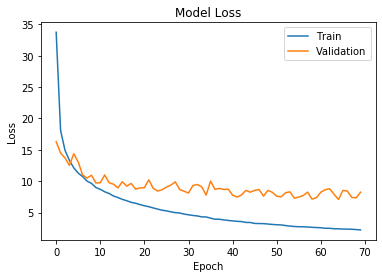

In [18]:
plot_loss(history)
plt.show()

In [19]:
file = open("/home/hamidraei/Odometry_project/test.txt")
speedTruthArrayString = file.readlines()
speedTruthArray1 = []
for numeric_string in speedTruthArrayString:
    numeric_string = numeric_string.strip('\n')
    speedTruthArray1.append(float(numeric_string))

In [20]:
len(speedTruthArray1)

10798

In [21]:
y_test = np.asarray(speedTruthArray1)



In [22]:
y_test.shape

(10798,)

In [23]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [24]:
y_test.shape

(10798, 1)

In [34]:
path = "/home/hamidraei/Odometry_project/video_trained"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory /home/hamidraei/Odometry_project/video_trained 


In [ ]:
for i in range(10798):
    A = cv2.imread(f'/home/hamidraei/Odometry_project/test_frames/{i}.jpg')
    A = cv2.Canny(A, 100, 200)
    height, width= A.shape
    height_cutoff = height//2

    x1 = A[height_cutoff:, :]
    height_1,width_2=x1.shape
    height_cutoff1 = (55*height_1)//100
    x2 = x1[:height_cutoff1, :]
    dim =(int(x2.shape[1]*0.5), int(x2.shape[0]*0.5))
    resized = cv2.resize(x2, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_test/{i}.jpg', resized)
    

In [33]:
X2 = []

In [34]:
for i in range(10797):
    if i == 0:
        A = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview_test/{i}.jpg', 0)
        B = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview_test/{i+1}.jpg', 0)
        flow = cv2.calcOpticalFlowFarneback(A, B,flow_mat,image_scale,nb_images,win_size,
                                            nb_iterations,
                                            deg_expansion,
                                            STD,
                                            0)
        
        
        X2.append(flow)
        X2.append(flow)
        
        #Q = cv2.imread('/home/hamidraei/Odometry_project/Cannyview/1.jpg')
        #hsv = np.zeros_like(Q)
        #hsv[..., 1] = 255
        #mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        #hsv[..., 0] = ang * 180 / np.pi / 2
        #hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        #C = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i}.jpg',C)
        
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i+1}.jpg',C)
                                            
                                            
                                            
    else:
        A = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview_test/{i}.jpg', 0)
        B = cv2.imread(f'/home/hamidraei/Odometry_project/Cannyview_test/{i+1}.jpg', 0)
        flow = cv2.calcOpticalFlowFarneback(A, B,flow_mat,image_scale,nb_images,win_size,
                                            nb_iterations,
                                            deg_expansion,
                                            STD,
                                            0)
        
        X2.append(flow)
        
        #Q = cv2.imread('/home/hamidraei/Odometry_project/Cannyview/1.jpg')
        #hsv = np.zeros_like(Q)
        #hsv[..., 1] = 255
        #mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        #hsv[..., 0] = ang * 180 / np.pi / 2
        #hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        #C = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i}.jpg',C)
        
        #cv2.imwrite(f'/home/hamidraei/Odometry_project/Cannyview_opticalflow/{i+1}.jpg',C)
        #print(i)
        
    

In [35]:
X_test = np.array(X2)

In [36]:
X_test.shape

(10798, 66, 320, 2)

In [37]:
model.predict(X_test[2080:2090])

array([[ 5.6933947],
       [10.159789 ],
       [11.468162 ],
       [12.025223 ],
       [10.300179 ],
       [12.901959 ],
       [12.92361  ],
       [13.400366 ],
       [13.0462885],
       [14.275281 ]], dtype=float32)

In [ ]:
y_test[2080:2090]

In [ ]:
X[].shape

In [29]:
XX = np.reshape(X[19003], (1, 66, 320, 2))

In [30]:
model.predict(XX)

array([[7.553457]], dtype=float32)

In [ ]:
print(y[1])

In [28]:
X[1].shape

(66, 320, 2)

In [26]:
import sys
import time

def delete_last_line():
    "Use this function to delete the last line in the STDOUT"

    #cursor up one line
    sys.stdout.write('\x1b[1A')

    #delete last line
    sys.stdout.write('\x1b[2K')


In [28]:
from IPython.display import clear_output

In [43]:
import time
import sys
for i in range(12400, 14000):
    A = cv2.imread(f'/home/hamidraei/Odometry_project/train_frames/{i}.jpg')
    
    XX = np.reshape(X[i], (1, 66, 320, 2))
    pred = model.predict(XX)
    act = y[i]
    #print(pred, end="")
    #sys.stdout.flush()
    #print("")
    #time.sleep(1)
    #print('\rHow is your day?') 
    #text = 'GeeksforGeeks'
  
    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
  
    # org
    org = (5, 25)
    org1 = (5, 45)
  
    # fontScale
    fontScale = 0.5
   
    # Red color in BGR
    color = (0, 0, 255)
  
    # Line thickness of 2 px
    thickness = 1
    text = f'The actual speed is {act} and the prediction is {pred}'
    text1 =f' The difference between these two is {abs(act - pred)}'

    #print(f'The actual speed is {act} and the prediction is {pred}')
    #print(f'The differences between these two are {abs(act - pred)}')
    A = cv2.putText(A, text, org, font, fontScale, 
                 color, thickness, cv2.LINE_AA, False)
    A = cv2.putText(A, text1, org1, font, fontScale, 
                 color, thickness, cv2.LINE_AA, False)
    cv2.imshow("A", A)
    #clear_output()
    cv2.waitKey(2)
    cv2.imwrite(f"/home/hamidraei/Odometry_project/video_trained/{i-12400}.jpg", A)
    
    
cv2.destroyAllWindows()

In [44]:
import cv2
import numpy as np
import glob

img_array = []
for i in range(1600):
    img = cv2.imread(f'/home/hamidraei/Odometry_project/video_trained/{i}.jpg')
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('main.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()